In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [16]:
x_train = np.array ([[4.7], [2.4], [7.5], [7.1], [4.3], [7.816], [8.9], [5.2], [8.59], [2.1], [8], [10], [4.5], [6], [4]], dtype=np.float32)
y_train = np.array([[2.6], [1.6], [3.09], [2.4], [2.4], [3.357], [2.6], [1.96], [3.53], [1.76], [3.2], [3.5], [1.6], [2.5], [2.2]], dtype=np.float32)

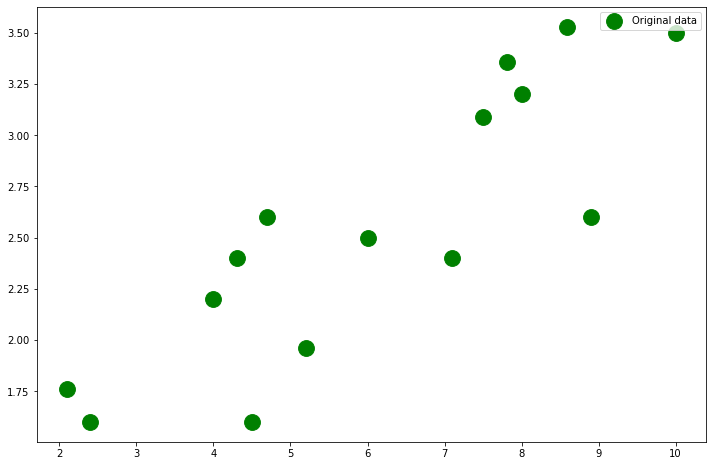

In [17]:
plt.figure(figsize=(12,8))
plt.scatter(x_train, y_train, label='Original data', s=250, c='g')
plt.legend()
plt.show()

In [18]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


In [19]:
input_size = 1
hidden_size = 1
output_size = 1

In [20]:
w1 = torch.rand(input_size, hidden_size, requires_grad=True) #weights that correspond to connection between input and hidden layer
w1.shape

torch.Size([1, 1])

In [21]:
w2 = torch.rand(hidden_size, output_size, requires_grad=True) #weights that correspond to connection between hidden and output layer
w2.shape

torch.Size([1, 1])

In [22]:
learning_rate = 1e-6

In [29]:
for iter in range(1, 3000):
    y_pred = X_train.mm(w1).mm(w2) #Performs a forward pass through the neural network constructed using a single linear neuron with no activation function
                                   #Where mm is multiplication
    loss = (y_pred - Y_train).pow(2).sum() #This is the mean square error loss function for linear regression

    if iter % 50 == 0:
        print(iter, loss.item()) #This prints out loss to help us see that we are converging towards a result
    
    loss.backward() #Calculates gradient by back pass
    
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

50 4.476041793823242
100 4.428529739379883
150 4.386773109436035
200 4.350088119506836
250 4.317867279052734
300 4.289584159851074
350 4.264766216278076
400 4.242990970611572
450 4.2238945960998535
500 4.207150936126709
550 4.192474842071533
600 4.179610252380371
650 4.168340682983398
700 4.158467769622803
750 4.1498212814331055
800 4.142252445220947
850 4.135623931884766
900 4.129822254180908
950 4.124744415283203
1000 4.12030029296875
1050 4.116412162780762
1100 4.113011837005615
1150 4.110034942626953
1200 4.107433319091797
1250 4.105156898498535
1300 4.103166580200195
1350 4.10142707824707
1400 4.099904537200928
1450 4.098574161529541
1500 4.097411632537842
1550 4.096395492553711
1600 4.095506191253662
1650 4.094730377197266
1700 4.094051361083984
1750 4.09345817565918
1800 4.092940330505371
1850 4.092487812042236
1900 4.092092037200928
1950 4.0917463302612305
2000 4.0914435386657715
2050 4.091179847717285
2100 4.0909504890441895
2150 4.090747833251953
2200 4.090571880340576
2250 4

In [24]:
print('w1: ', w1)
print('w2: ', w2)

w1:  tensor([[0.3968]], requires_grad=True)
w2:  tensor([[0.9333]], requires_grad=True)


In [25]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

In [26]:
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[1.7405],
        [0.8888],
        [2.7775],
        [2.6293],
        [1.5924],
        [2.8945],
        [3.2959],
        [1.9257],
        [3.1811],
        [0.7777],
        [2.9626],
        [3.7033],
        [1.6665],
        [2.2220],
        [1.4813]], grad_fn=<MmBackward>)

In [27]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.7405415],
       [0.8887872],
       [2.7774599],
       [2.6293287],
       [1.5924104],
       [2.8944836],
       [3.295919 ],
       [1.9257054],
       [3.1811175],
       [0.7776888],
       [2.962624 ],
       [3.70328  ],
       [1.666476 ],
       [2.221968 ],
       [1.481312 ]], dtype=float32)

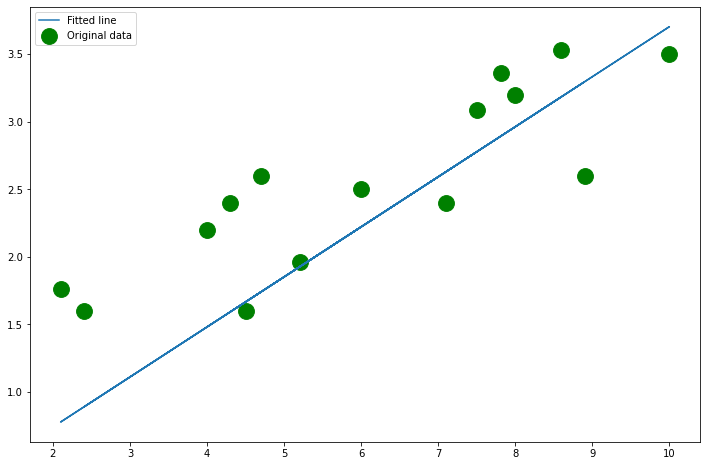

In [28]:
plt.figure(figsize=(12, 8))
plt.scatter(x_train, y_train, label='Original data', s=250, c='g')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()